In [1]:
#Libraries added
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
#The functions we will use in the future have been defined
def label_graph(ticksfont, x_label, y_label, title_label, fontsize):
    plt.xticks(fontsize=ticksfont)
    plt.yticks(fontsize=ticksfont)
    plt.xlabel(x_label, fontsize=fontsize)
    plt.ylabel(y_label, fontsize=fontsize)
    plt.title(title_label, fontsize=fontsize)
def median(array):
    median = np.median(array)
    return print("Median:", median)
def mean(array):
    mean = np.mean(array)
    return print("Mean:", mean)
def variance(array):
    variance = np.var(array)
    return print("Variance:", variance)

In [3]:
#The file to be processed is assigned to the variable
src = "residentialDwellingPropertyTransactions.csv"

In [4]:
#Dataframe created
firstDF = pd.read_csv(src)

In [5]:
#First 5 (default) lines viewed
firstDF.head()

,Statistic Label,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,UNIT,VALUE
0,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - All,Market,Number,5.0
1,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - All,Non-Market,Number,0.0
2,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Market,Number,0.0
3,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Non-Market,Number,0.0
4,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - Former Owner-Occupier,Market,Number,3.0


In [6]:
#Last 5 (default) lines viewed
firstDF.tail()

,Statistic Label,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,UNIT,VALUE
682235,Median Price,2023 August,Monaghan,Existing,Executions,Household Buyer - Former Owner-Occupier,Non-Market,Euro,165000.0
682236,Median Price,2023 August,Monaghan,Existing,Executions,Household Buyer - Non-Occupier,Market,Euro,NaN
682237,Median Price,2023 August,Monaghan,Existing,Executions,Household Buyer - Non-Occupier,Non-Market,Euro,35000.0
682238,Median Price,2023 August,Monaghan,Existing,Executions,Non-Household Buyer,Market,Euro,39750.0
682239,Median Price,2023 August,Monaghan,Existing,Executions,Non-Household Buyer,Non-Market,Euro,NaN


In [7]:
#The names of some columns have been changed
newNames =  {"UNIT": "Unit", "VALUE": "Value"}
firstDF.rename(columns=newNames, inplace=True)

In [8]:
#To provide clearer data, division was made in the months column
firstDF[["Year", "Month"]] = firstDF.Month.str.split(" ", expand=True)

In [9]:
#First 5 lines viewed
firstDF.head(5)

,Statistic Label,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Unit,Value,Year
0,Volume of Sales,January,Carlow,New,Filings,Household Buyer - All,Market,Number,5.0,2010
1,Volume of Sales,January,Carlow,New,Filings,Household Buyer - All,Non-Market,Number,0.0,2010
2,Volume of Sales,January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Market,Number,0.0,2010
3,Volume of Sales,January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Non-Market,Number,0.0,2010
4,Volume of Sales,January,Carlow,New,Filings,Household Buyer - Former Owner-Occupier,Market,Number,3.0,2010


In [10]:
#Total number of columns and rows were checked
firstDF.shape

(682240, 10)

In [11]:
#The names of the columns were learned
firstDF.columns

Index(['Statistic Label', 'Month', 'County', 'Dwelling Status',
       'Stamp Duty Event', 'Type of Buyer', 'Type of Sale', 'Unit', 'Value',
       'Year'],
      dtype='object')

In [12]:
#Data types of columns were learned
firstDF.dtypes

Statistic Label      object
Month                object
County               object
Dwelling Status      object
Stamp Duty Event     object
Type of Buyer        object
Type of Sale         object
Unit                 object
Value               float64
Year                 object
dtype: object

In [13]:
#The number of elements in the columns was learned
firstDF.count()

Statistic Label     682240
Month               682240
County              682240
Dwelling Status     682240
Stamp Duty Event    682240
Type of Buyer       682240
Type of Sale        682240
Unit                682240
Value               580400
Year                682240
dtype: int64

In [14]:
#More detailed information was received about the columns
firstDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682240 entries, 0 to 682239
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Statistic Label   682240 non-null  object 
 1   Month             682240 non-null  object 
 2   County            682240 non-null  object 
 3   Dwelling Status   682240 non-null  object 
 4   Stamp Duty Event  682240 non-null  object 
 5   Type of Buyer     682240 non-null  object 
 6   Type of Sale      682240 non-null  object 
 7   Unit              682240 non-null  object 
 8   Value             580400 non-null  float64
 9   Year              682240 non-null  object 
dtypes: float64(1), object(9)
memory usage: 52.1+ MB


In [15]:
#Rows containing null values were detected
firstDF.isnull().sum()

Statistic Label          0
Month                    0
County                   0
Dwelling Status          0
Stamp Duty Event         0
Type of Buyer            0
Type of Sale             0
Unit                     0
Value               101840
Year                     0
dtype: int64

In [16]:
#Rows with NaN values were ignored
firstDF[firstDF["Value"].notna()]
#firstDF.dropna(inplace=True) -> Rows with #NaN values were deleted

,Statistic Label,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Unit,Value,Year
0,Volume of Sales,January,Carlow,New,Filings,Household Buyer - All,Market,Number,5.0,2010
1,Volume of Sales,January,Carlow,New,Filings,Household Buyer - All,Non-Market,Number,0.0,2010
2,Volume of Sales,January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Market,Number,0.0,2010
3,Volume of Sales,January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Non-Market,Number,0.0,2010
4,Volume of Sales,January,Carlow,New,Filings,Household Buyer - Former Owner-Occupier,Market,Number,3.0,2010
...,...,...,...,...,...,...,...,...,...,...
682232,Median Price,August,Monaghan,Existing,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Market,Euro,225000.0,2023
682234,Median Price,August,Monaghan,Existing,Executions,Household Buyer - Former Owner-Occupier,Market,Euro,224000.0,2023
682235,Median Price,August,Monaghan,Existing,Executions,Household Buyer - Former Owner-Occupier,Non-Market,Euro,165000.0,2023
682237,Median Price,August,Monaghan,Existing,Executions,Household Buyer - Non-Occupier,Non-Market,Euro,35000.0,2023


In [17]:
#It was checked again whether the Nan values were present or not
firstDF.isnull().sum()

Statistic Label          0
Month                    0
County                   0
Dwelling Status          0
Stamp Duty Event         0
Type of Buyer            0
Type of Sale             0
Unit                     0
Value               101840
Year                     0
dtype: int64

In [18]:
#It was made an int to avoid confusion when using Year Column
firstDF["Year"] = firstDF["Year"].apply(np.int64)

In [19]:
#Describe function was used
print(firstDF['Statistic Label'].describe())
print("----------")
print(firstDF['Month'].describe())
print("----------")
print(firstDF['County'].describe())
print("----------")
print(firstDF['Dwelling Status'].describe())
print("----------")
print(firstDF['Stamp Duty Event'].describe())
print("----------")
print(firstDF['Type of Buyer'].describe())
print("----------")
print(firstDF['Type of Sale'].describe())
print("----------")
print(firstDF['Unit'].describe())

count              682240
unique                  4
top       Volume of Sales
freq               170560
Name: Statistic Label, dtype: object
----------
count      682240
unique         12
top       January
freq        58240
Name: Month, dtype: object
----------
count     682240
unique        26
top       Carlow
freq       26240
Name: County, dtype: object
----------
count     682240
unique         2
top          New
freq      341120
Name: Dwelling Status, dtype: object
----------
count      682240
unique          2
top       Filings
freq       341120
Name: Stamp Duty Event, dtype: object
----------
count                    682240
unique                        5
top       Household Buyer - All
freq                     136448
Name: Type of Buyer, dtype: object
----------
count     682240
unique         2
top       Market
freq      341120
Name: Type of Sale, dtype: object
----------
count     682240
unique         3
top         Euro
freq      341120
Name: Unit, dtype: object


In [20]:
#Unique function was used
print(firstDF['Statistic Label'].unique())
print("----------")
print(firstDF['Month'].unique())
print("----------")
print(firstDF['County'].unique())
print("----------")
print(firstDF['Dwelling Status'].unique())
print("----------")
print(firstDF['Stamp Duty Event'].unique())
print("----------")
print(firstDF['Type of Buyer'].unique())
print("----------")
print(firstDF['Type of Sale'].unique())
print("----------")
print(firstDF['Unit'].unique())
print("----------")
print(firstDF['Year'].unique())

['Volume of Sales' 'Value of Sales' 'Mean Sale Price' 'Median Price']
----------
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
----------
['Carlow' 'Dublin' 'Kildare' 'Kilkenny' 'Laois' 'Longford' 'Louth' 'Meath'
 'Offaly' 'Westmeath' 'Wexford' 'Wicklow' 'Clare' 'Cork' 'Kerry'
 'Limerick' 'Tipperary' 'Waterford' 'Galway' 'Leitrim' 'Mayo' 'Roscommon'
 'Sligo' 'Cavan' 'Donegal' 'Monaghan']
----------
['New' 'Existing']
----------
['Filings' 'Executions']
----------
['Household Buyer - All'
 'Household Buyer - First-Time Buyer Owner-Occupier'
 'Household Buyer - Former Owner-Occupier'
 'Household Buyer - Non-Occupier' 'Non-Household Buyer']
----------
['Market' 'Non-Market']
----------
['Number' 'Euro Million' 'Euro']
----------
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [21]:
#The data we will use to visualize has been transferred to a new dataframe
numberOfHousesDF = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market")]

year2011 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2011].Value.sum()
year2012 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2012].Value.sum()
year2013 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2013].Value.sum()
year2014 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2014].Value.sum()
year2015 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2015].Value.sum()
year2016 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2016].Value.sum()
year2017 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2017].Value.sum()
year2018 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2018].Value.sum()
year2019 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2019].Value.sum()
year2020 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2020].Value.sum()
year2021 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2021].Value.sum()
year2022 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2022].Value.sum()
year2023 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2023].Value.sum()

dictNumberOfHouses_year = {"Year": [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], "Value": [year2011, year2012, year2013, year2014, year2015, year2016, year2017, year2018, year2019, year2020, year2021, year2022, year2023]}
numberOfHousesDF_year = pd.DataFrame(dictNumberOfHouses_year)

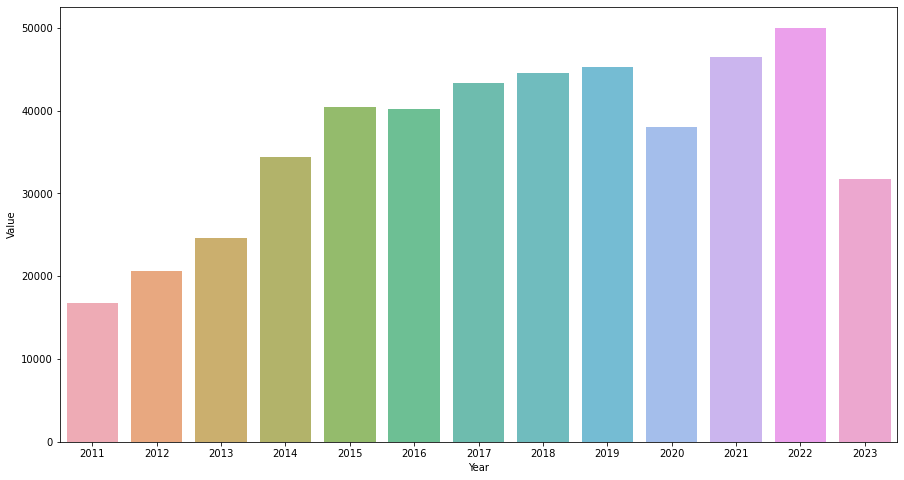

In [22]:
#Barplot visualization was done
fig = plt.figure(figsize=(15,8))
sns.barplot(x="Year", y="Value", data=numberOfHousesDF_year, alpha=0.8);

In [23]:
#Data listed in dataframe
numberOfHousesDF_year.style.background_gradient(axis=0, gmap=numberOfHousesDF_year["Value"], cmap="RdYlBu")

,Year,Value
0,2011,16811.000000
1,2012,20680.000000
2,2013,24568.000000
3,2014,34417.000000
4,2015,40438.000000
5,2016,40150.000000
6,2017,43354.000000
7,2018,44499.000000
8,2019,45276.000000
9,2020,38010.000000


In [24]:
#Maximum and minimum values for housing sales were printed on the screen
maxYearValue = np.amax(numberOfHousesDF_year).apply(np.int64)
minYearValue = np.min(numberOfHousesDF_year).apply(np.int64)
print("The highest number of housing sales were realized in", maxYearValue[0], "as", maxYearValue[1])
print("The lowest number of housing sales were realized in", minYearValue[0], "as", minYearValue[1])

The highest number of housing sales were realized in 2023 as 50025
The lowest number of housing sales were realized in 2011 as 16811


In [25]:
#The data we will use to visualize has been transferred to a new dataframe
numberOfHousesDF = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market")]

jan = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "January"].Value.sum()
feb = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "February"].Value.sum()
mar = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "March"].Value.sum()
apr = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "April"].Value.sum()
may = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "May"].Value.sum()
jun = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "June"].Value.sum()
jul = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "July"].Value.sum()
aug = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "August"].Value.sum()
sep = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "September"].Value.sum()
oct = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "October"].Value.sum()
nov = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "November"].Value.sum()
dec = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "December"].Value.sum()

dictNumberOfHouses_month = {"Month": ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct", "Nov","Dec"], "Value": [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]}
numberOfHousesDF_month = pd.DataFrame(dictNumberOfHouses_month)

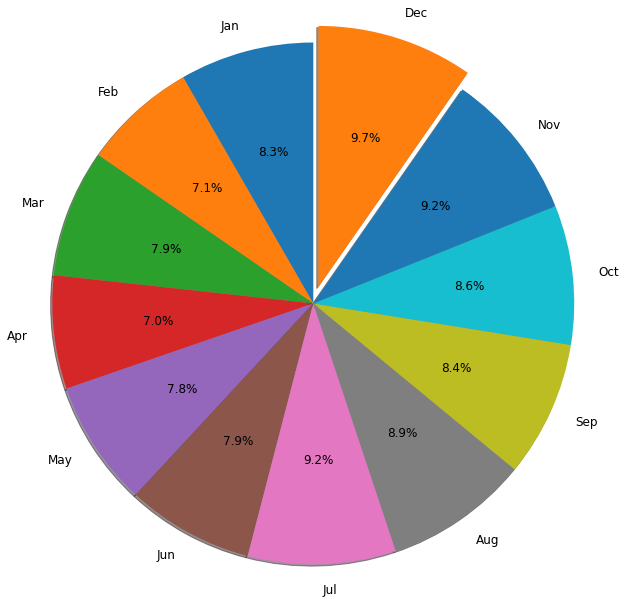

In [26]:
#Pie visualization was done
fig, ax = plt.subplots()
piece = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2)  
ax.pie(x="Value", labels="Month", autopct="%1.1f%%", data=numberOfHousesDF_month, explode=piece, shadow={"ox": -0.01, "edgecolor": "blue", "shade": 1}, startangle=90,  textprops={"size": "large"}, radius=3)
plt.show()

In [27]:
#Data listed in dataframe
numberOfHousesDF_month.style.background_gradient(axis=0, gmap=numberOfHousesDF_month["Value"], cmap="PuOr")

,Month,Value
0,Jan,41193.000000
1,Feb,35048.000000
2,Mar,39116.000000
3,Apr,34779.000000
4,May,38711.000000
5,Jun,38927.000000
6,Jul,45426.000000
7,Aug,44158.000000
8,Sep,41758.000000
9,Oct,42766.000000


In [28]:
#Median mean and variance printed to screen
median(numberOfHousesDF_month["Value"])
mean(numberOfHousesDF_month["Value"])
variance(numberOfHousesDF_month["Value"])
numberOfHousesDF_month

Median: 41475.5
Mean: 41303.583333333336
Variance: 15938656.57638889


,Month,Value
0,Jan,41193.0
1,Feb,35048.0
2,Mar,39116.0
3,Apr,34779.0
4,May,38711.0
5,Jun,38927.0
6,Jul,45426.0
7,Aug,44158.0
8,Sep,41758.0
9,Oct,42766.0


In [29]:
#Above Average Sales has been created and values below the average are labeled as 0 and those above the average are labeled as 1
numberOfHousesDF_month["Above Average Sales"] = 0
for i in range(12):
    if numberOfHousesDF_month["Value"][i] > np.mean(numberOfHousesDF_month["Value"]):
        numberOfHousesDF_month["Above Average Sales"][i] = "1"
    else:
        numberOfHousesDF_month["Above Average Sales"][i] = "0"
        
numberOfHousesDF_month

,Month,Value,Above Average Sales
0,Jan,41193.0,0
1,Feb,35048.0,0
2,Mar,39116.0,0
3,Apr,34779.0,0
4,May,38711.0,0
5,Jun,38927.0,0
6,Jul,45426.0,1
7,Aug,44158.0,1
8,Sep,41758.0,1
9,Oct,42766.0,1


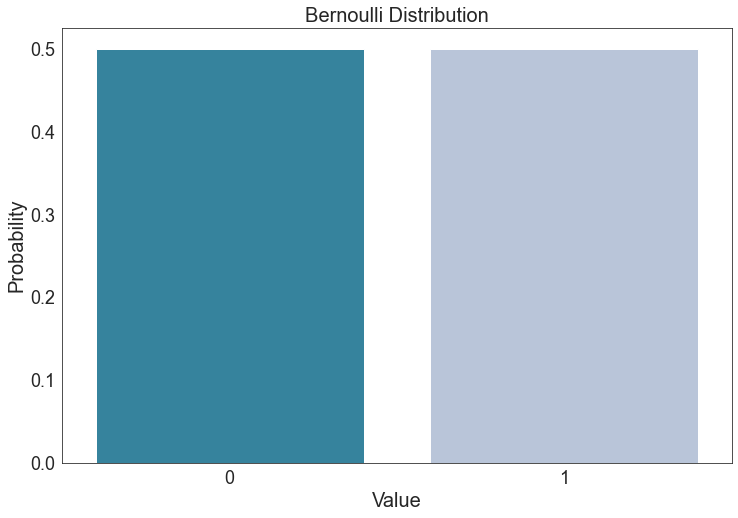

In [30]:
#Bernoulli distribution
sns.set_style("white")
fig,ax=plt.subplots(figsize=(12,8))
probabilities=numberOfHousesDF_month["Above Average Sales"].value_counts(normalize=True)
ax=sns.barplot(x=probabilities.index, y=probabilities.values, palette="PuBuGn_r")
patches=ax.patches
label_graph(18,"Value","Probability","Bernoulli Distribution", 20)

[0.01940841 0.09057258]


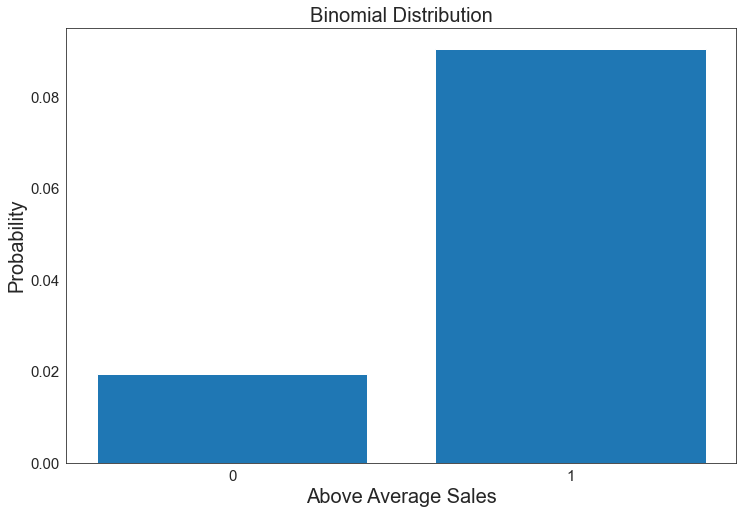

In [31]:
#Binomial distribution
aboveAvarageSales=numberOfHousesDF_month[numberOfHousesDF_month["Above Average Sales"]== 1]
aboveAvarageSales["Value"].value_counts(normalize=True)
n=12
p=0.28
x=np.arange(0,2)
fig,ax=plt.subplots(figsize=(12,8))
pmf=stats.binom.pmf(x,n,p)
pps=plt.bar(x,pmf)
print(pmf)
plt.locator_params(integer=True)
label_graph(15,"Above Average Sales", "Probability", "Binomial Distribution",20)

In [32]:
#Data for Ireland's 13 largest counties from 2011-2023
lstCounty =  ["Dublin", "Cork", "Galway", "Limerick", "Waterford", "Kildare", "Meath", "Wexford", "Kerry", "Wicklow", "Westmeath", "Carlow", "Kilkenny"]

countOfHousesDF_2023 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2023)]
countOfHousesDF_2022 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2022)]
countOfHousesDF_2021 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2021)]
countOfHousesDF_2020 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2020)]
countOfHousesDF_2019 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2019)]
countOfHousesDF_2018 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2018)]
countOfHousesDF_2017 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2017)]
countOfHousesDF_2016 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2016)]
countOfHousesDF_2015 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2015)]
countOfHousesDF_2014 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2014)]
countOfHousesDF_2013 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2013)]
countOfHousesDF_2012 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2012)]
countOfHousesDF_2011 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2011)]

values = [[] for _ in range(13)]  

for county in lstCounty:
    values[0].append(countOfHousesDF_2023.loc[countOfHousesDF_2023["County"] == county].Value.sum())
    values[1].append(countOfHousesDF_2022.loc[countOfHousesDF_2022["County"] == county].Value.sum())
    values[2].append(countOfHousesDF_2021.loc[countOfHousesDF_2021["County"] == county].Value.sum())
    values[3].append(countOfHousesDF_2020.loc[countOfHousesDF_2020["County"] == county].Value.sum())
    values[4].append(countOfHousesDF_2019.loc[countOfHousesDF_2019["County"] == county].Value.sum())
    values[5].append(countOfHousesDF_2018.loc[countOfHousesDF_2018["County"] == county].Value.sum())
    values[6].append(countOfHousesDF_2017.loc[countOfHousesDF_2017["County"] == county].Value.sum())
    values[7].append(countOfHousesDF_2016.loc[countOfHousesDF_2016["County"] == county].Value.sum())
    values[8].append(countOfHousesDF_2015.loc[countOfHousesDF_2015["County"] == county].Value.sum())
    values[9].append(countOfHousesDF_2014.loc[countOfHousesDF_2014["County"] == county].Value.sum())
    values[10].append(countOfHousesDF_2013.loc[countOfHousesDF_2013["County"] == county].Value.sum())
    values[11].append(countOfHousesDF_2012.loc[countOfHousesDF_2012["County"] == county].Value.sum())
    values[12].append(countOfHousesDF_2011.loc[countOfHousesDF_2011["County"] == county].Value.sum())
    
dictCountOfHouses = {"County": ["Dublin", "Cork", "Galway", "Limerick", "Waterford", "Kildare", "Meath", "Wexford", "Kerry", "Wicklow", "Westmeath", "Carlow", "Kilkenny"], 
                 "2023": [values[0][0], values[1][0], values[2][0], values[3][0], values[4][0], values[5][0], values[6][0], values[7][0], values[8][0], values[9][0], values[10][0], values[11][0], values[12][0]],
                "2022": [values[0][1], values[1][1], values[2][1], values[3][1], values[4][1], values[5][1], values[6][1], values[7][1], values[8][1], values[9][1], values[10][1], values[11][1], values[12][1]],
                "2021": [values[0][2], values[1][2], values[2][2], values[3][2], values[4][2], values[5][2], values[6][2], values[7][2], values[8][2], values[9][2], values[10][2], values[11][2], values[12][2]],
                "2020": [values[0][3], values[1][3], values[2][3], values[3][3], values[4][3], values[5][3], values[6][3], values[7][3], values[8][3], values[9][3], values[10][3], values[11][3], values[12][3]],
                "2019": [values[0][4], values[1][4], values[2][4], values[3][4], values[4][4], values[5][4], values[6][4], values[7][4], values[8][4], values[9][4], values[10][4], values[11][4], values[12][4]],
                "2018": [values[0][5], values[1][5], values[2][5], values[3][5], values[4][5], values[5][5], values[6][5], values[7][5], values[8][5], values[9][5], values[10][5], values[11][5], values[12][5]],
                "2017": [values[0][6], values[1][6], values[2][6], values[3][6], values[4][6], values[5][6], values[6][6], values[7][6], values[8][6], values[9][6], values[10][6], values[11][6], values[12][6]],
                "2016": [values[0][7], values[1][7], values[2][7], values[3][7], values[4][7], values[5][7], values[6][7], values[7][7], values[8][7], values[9][7], values[10][7], values[11][7], values[12][7]],
                "2015": [values[0][8], values[1][8], values[2][8], values[3][8], values[4][8], values[5][8], values[6][8], values[7][8], values[8][8], values[9][8], values[10][8], values[11][8], values[12][8]],
                "2014": [values[0][9], values[1][9], values[2][9], values[3][9], values[4][9], values[5][9], values[6][9], values[7][9], values[8][9], values[9][9], values[10][9], values[11][9], values[12][9]],
                "2013": [values[0][10], values[1][10], values[2][10], values[3][10], values[4][10], values[5][10], values[6][10], values[7][10], values[8][10], values[9][10], values[10][10], values[11][10], values[12][10]],
                "2012": [values[0][11], values[1][11], values[2][11], values[3][11], values[4][11], values[5][11], values[6][11], values[7][11], values[8][11], values[9][11], values[10][11], values[11][11], values[12][11]],
                "2011": [values[0][12], values[1][12], values[2][12], values[3][12], values[4][12], values[5][12], values[6][12], values[7][12], values[8][12], values[9][12], values[10][12], values[11][12], values[12][12]]}
    
countOfHousesDF_countyYear = pd.DataFrame(dictCountOfHouses)

In [33]:
#Data listed in dataframe
countOfHousesDF_countyYear.style.background_gradient(axis=0, cmap="pink")

,County,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,Dublin,9449.000000,3571.000000,1483.000000,1113.000000,856.000000,2206.000000,1491.000000,1193.000000,734.000000,1111.000000,606.000000,319.000000,478.000000
1,Cork,14643.000000,5339.000000,2224.000000,1806.000000,1418.000000,3329.000000,2454.000000,1870.000000,1334.000000,1823.000000,961.000000,524.000000,797.000000
2,Galway,13284.000000,5186.000000,2159.000000,1655.000000,1304.000000,2761.000000,2218.000000,1709.000000,1252.000000,1680.000000,873.000000,476.000000,736.000000
3,Limerick,11305.000000,4184.000000,1782.000000,1388.000000,1108.000000,2252.000000,1947.000000,1377.000000,1075.000000,1375.000000,716.000000,368.000000,548.000000
4,Waterford,14521.000000,4988.000000,2069.000000,1751.000000,1225.000000,2517.000000,2297.000000,1509.000000,1196.000000,1634.000000,808.000000,443.000000,638.000000
5,Kildare,14630.000000,4770.000000,2083.000000,1680.000000,1225.000000,2401.000000,2175.000000,1417.000000,1236.000000,1365.000000,841.000000,471.000000,635.000000
6,Meath,14163.000000,4791.000000,2085.000000,1668.000000,1132.000000,2236.000000,1997.000000,1396.000000,1238.000000,1447.000000,806.000000,416.000000,606.000000
7,Wexford,12818.000000,4471.000000,1961.000000,1508.000000,1186.000000,1894.000000,1437.000000,1342.000000,1242.000000,1274.000000,779.000000,426.000000,577.000000
8,Kerry,12311.000000,4618.000000,2257.000000,1600.000000,1129.000000,2029.000000,1512.000000,1433.000000,1241.000000,1190.000000,835.000000,430.000000,605.000000
9,Wicklow,11078.000000,3842.000000,1852.000000,1229.000000,893.000000,1621.000000,1343.000000,1250.000000,961.000000,1134.000000,718.000000,360.000000,546.000000


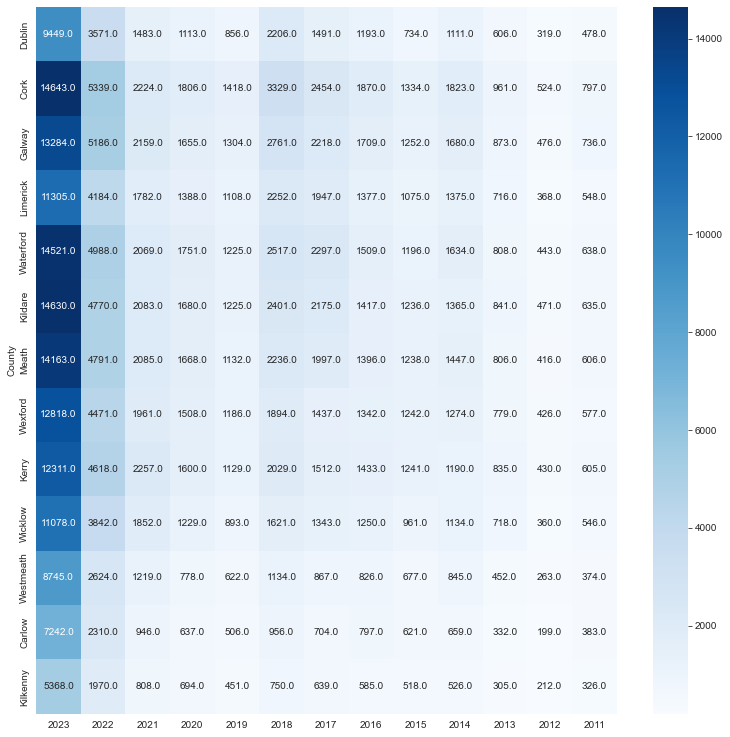

In [34]:
#Heatmap visualization was done
plt.figure(figsize=(13, 13))
sns.heatmap(data=countOfHousesDF_countyYear.set_index("County"), annot=True, cmap="Blues", fmt="")
plt.show()

In [35]:
#The total number of sales in 2023 was looked at
countOfHousesDF_countyYear["2023"] = countOfHousesDF_countyYear["2023"].apply(np.int64)
totalSales2023 = countOfHousesDF_countyYear["2023"].sum()
totalSales2023

149557

In [36]:
#A new data frame was created for machine learning algorithms. For this dataframe, 2000 random data were taken from firstDF
valueOfHousesDF = firstDF[(firstDF["Statistic Label"] == "Value of Sales") & (firstDF["Value"] > 0)]
valueOfHousesDF = valueOfHousesDF.drop(columns=['Statistic Label', "Unit"])
valueOfHousesDF = valueOfHousesDF.sample(2000)
valueOfHousesDF

,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Value,Year
246022,January,Kerry,Existing,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Market,1.8,2016
265378,August,Laois,New,Executions,Non-Household Buyer,Market,0.8,2017
197960,March,Westmeath,New,Filings,Household Buyer - All,Market,0.9,2012
332082,December,Offaly,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Market,0.3,2022
296232,January,Roscommon,Existing,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Market,1.6,2020
...,...,...,...,...,...,...,...,...
238731,June,Kerry,New,Executions,Household Buyer - All,Non-Market,0.1,2015
309796,February,Sligo,Existing,Executions,Household Buyer - Non-Occupier,Market,1.7,2021
218181,October,Mayo,Existing,Filings,Household Buyer - All,Non-Market,0.4,2013
262350,May,Louth,Existing,Executions,Household Buyer - All,Market,18.3,2017


In [37]:
#Label encoder was applied to the selected columns
columnLabelEncode = ["Month", "County", "Dwelling Status", 'Stamp Duty Event', "Type of Buyer","Type of Sale"]
labelEncoder = LabelEncoder()
for column in columnLabelEncode:
    valueOfHousesDF[column] = labelEncoder.fit_transform(valueOfHousesDF[column])

In [38]:
#After the label encoder was made, the describe function was applied to the dataframe
valueOfHousesDF.describe()

,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Value,Year
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.470500,12.199500,0.350500,0.511500,1.767000,0.295500,6.386550,2016.378000
std,3.433952,7.516578,0.477246,0.499993,1.381907,0.456381,26.764168,3.980834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,2010.000000
25%,2.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.300000,2013.000000
50%,5.000000,12.000000,0.000000,1.000000,2.000000,0.000000,0.900000,2016.000000
75%,8.000000,19.000000,1.000000,1.000000,3.000000,1.000000,3.500000,2020.000000
max,11.000000,25.000000,1.000000,1.000000,4.000000,1.000000,419.100000,2023.000000


In [39]:
#Checked the latest version of the data frame
valueOfHousesDF

,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Value,Year
246022,4,7,0,1,1,0,1.8,2016
265378,1,10,1,0,4,0,0.8,2017
197960,7,23,1,1,0,0,0.9,2012
332082,2,18,1,1,1,0,0.3,2022
296232,4,19,0,0,1,0,1.6,2020
...,...,...,...,...,...,...,...,...
238731,6,7,1,0,0,1,0.1,2015
309796,3,20,0,0,3,0,1.7,2021
218181,10,15,0,1,0,1,0.4,2013
262350,8,14,0,0,0,0,18.3,2017


In [40]:
#For processing the columns were divided into x and y
X = valueOfHousesDF.drop("County", axis = 1)
print(X)
y = valueOfHousesDF.Value.values.astype(int)
print(y)

        Month  Dwelling Status  Stamp Duty Event  Type of Buyer  Type of Sale  \
246022      4                0                 1              1             0   
265378      1                1                 0              4             0   
197960      7                1                 1              0             0   
332082      2                1                 1              1             0   
296232      4                0                 0              1             0   
...       ...              ...               ...            ...           ...   
238731      6                1                 0              0             1   
309796      3                0                 0              3             0   
218181     10                0                 1              0             1   
262350      8                0                 0              0             0   
177650      5                1                 0              0             0   

        Value  Year  
24602

In [41]:
#Each column was standardized and divided into two as train and test
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print(y_train.mean())
print(y_test.mean())

6.212857142857143
5.473333333333334


In [42]:
#SVC object created. C = 1 received. Model trained and prediction made
model = SVC(C = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
#Confusion matrix was used
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[296,   0,   1, ...,   0,   0,   0],
       [ 89,   0,   1, ...,   0,   0,   0],
       [ 47,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   1,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [44]:
#Accuracy, Precision Score, Recall Score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred, pos_label="positive", average="micro"))
print("Recall Score:",recall_score(y_test, y_pred, pos_label="positive", average="micro"))

Accuracy: 0.49333333333333335
Precision Score: 0.49333333333333335
Recall Score: 0.49333333333333335


In [45]:
#Created a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
model = SVC(C = 1)

In [46]:
#Computed the cross-validation scores. Printed 5 accuracies obtained from the 5 folds
cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = "accuracy") 
print(cv_results)
print("Mean Accuracy = {}".format(cv_results.mean()))

[0.47857143 0.54285714 0.45357143 0.5        0.56428571]
Mean Accuracy = 0.5078571428571428


In [47]:
#Specified range of parameters (C) as a list and set up grid search scheme
params = {"C": [0.1, 1, 10, 100, 1000]}
model = SVC()
model_cv = GridSearchCV(estimator = model, param_grid = params, scoring= "accuracy", cv = folds, verbose = 1, return_train_score=True)      

In [48]:
#Model trained and results printed on screen
model_cv.fit(X_train, y_train)  
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.113409,0.006115,0.037179,7.927788e-03,0.1,{'C': 0.1},0.492857,0.542857,0.457143,0.500000,...,0.511429,0.037958,3,0.516071,0.503571,0.525000,0.514286,0.498214,0.511429,0.009490
1,0.128094,0.006256,0.031246,8.083199e-06,1,{'C': 1},0.478571,0.542857,0.453571,0.500000,...,0.507857,0.040683,5,0.549107,0.515179,0.542857,0.531250,0.514286,0.530536,0.014122
2,0.146838,0.007650,0.031243,7.341434e-06,10,{'C': 10},0.482143,0.535714,0.457143,0.521429,...,0.511429,0.037211,3,0.653571,0.633929,0.652679,0.654464,0.642857,0.647500,0.007974
3,0.193705,0.007648,0.031242,4.768372e-07,100,{'C': 100},0.582143,0.614286,0.539286,0.585714,...,0.585714,0.026245,2,0.907143,0.907143,0.892857,0.899107,0.900000,0.901250,0.005405
4,0.278059,0.011694,0.028116,6.253219e-03,1000,{'C': 1000},0.625000,0.628571,0.564286,0.667857,...,0.632143,0.039448,1,0.993750,0.997321,0.995536,0.992857,0.994643,0.994821,0.001536


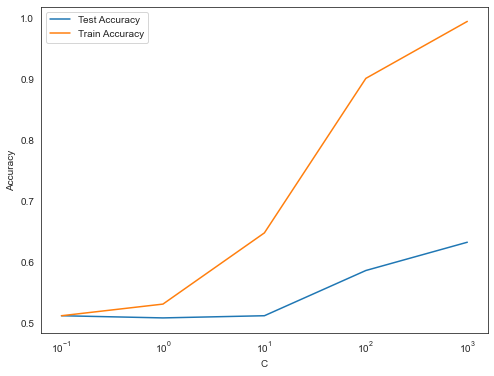

In [49]:
#Plot of C versus train and test scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results["param_C"], cv_results["mean_test_score"])
plt.plot(cv_results["param_C"], cv_results["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend(["Test Accuracy", "Train Accuracy"], loc="upper left")
plt.xscale("log")

In [50]:
#The highest test accuracy printed on the screen
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.6321428571428571 at C = 1000


In [51]:
#The model with the best C value was trained and made predictions
model = SVC(C=best_C)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [52]:
#Accuracy, Precision Score, Recall Score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall Score:",recall_score(y_test, y_pred, pos_label='positive', average='micro'))

Accuracy: 0.675
Precision Score: 0.675
Recall Score: 0.675


In [53]:
#Standard scaler object created.
scalar = StandardScaler()
scalar.fit(valueOfHousesDF)
scaled_data = scalar.transform(valueOfHousesDF)
scaled_data

array([[-0.42833091, -0.69191062, -0.73460594, ..., -0.64764683,
        -0.17141191, -0.09497872],
       [-1.30217841, -0.29269303,  1.36127405, ..., -0.64764683,
        -0.20878464,  0.15628774],
       [ 0.44551658,  1.43724987,  1.36127405, ..., -0.64764683,
        -0.20504737, -1.10004458],
       ...,
       [ 1.31936408,  0.37266962, -0.73460594, ...,  1.54405141,
        -0.22373373, -0.84877812],
       [ 0.73679908,  0.23959709, -0.73460594, ..., -0.64764683,
         0.44523818,  0.15628774],
       [-0.13704842,  0.90495974,  1.36127405, ..., -0.64764683,
        -0.16020009, -1.60257752]])

In [54]:
#PCA = 2 received
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(2000, 2)

Text(0, 0.5, 'Second Principal Component')

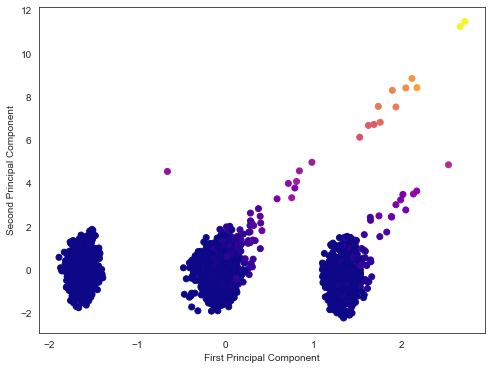

In [55]:
#Visualized with scatter
plt.figure(figsize = (8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = valueOfHousesDF["Value"], cmap ="plasma")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

[[5.48240694e+00 1.23482917e+01 3.51861295e-01 5.12493626e-01
  1.77817440e+00 3.00866905e-01 3.31387047e+00 2.01634625e+03]
 [4.16666667e+00 5.00000000e+00 5.55111512e-17 4.16666667e-01
  1.33333333e+00 0.00000000e+00 2.99516667e+02 2.01758333e+03]
 [5.18518519e+00 4.59259259e+00 4.07407407e-01 4.81481481e-01
  1.14814815e+00 3.70370370e-02 9.92740741e+01 2.01814815e+03]]


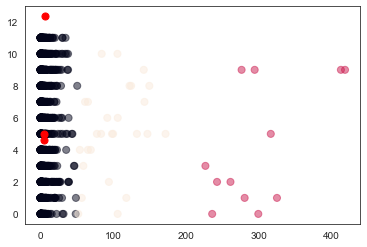

In [56]:
#K-means clustering created and visualized
kmeans = KMeans(n_clusters=3).fit(valueOfHousesDF)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(valueOfHousesDF["Value"], valueOfHousesDF["Month"], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=50)
plt.show()

In [57]:
valueOfHousesDF

,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Value,Year
246022,4,7,0,1,1,0,1.8,2016
265378,1,10,1,0,4,0,0.8,2017
197960,7,23,1,1,0,0,0.9,2012
332082,2,18,1,1,1,0,0.3,2022
296232,4,19,0,0,1,0,1.6,2020
...,...,...,...,...,...,...,...,...
238731,6,7,1,0,0,1,0.1,2015
309796,3,20,0,0,3,0,1.7,2021
218181,10,15,0,1,0,1,0.4,2013
262350,8,14,0,0,0,0,18.3,2017


In [58]:
#The algorithms were enabled to predict the entered data (It's trying to guess the dwelling status)
x = valueOfHousesDF.iloc[:,[0,1,3,4,5,6,7]]
y = valueOfHousesDF.iloc[:,2]
X = x.values
Y = y.values
enterData = [6,5,1,3,0,0.8,2020] # ->1
#enterData = [3,2,0,3,1,0.8,2012]

In [59]:
#Data split for training and testing. It was later scaled
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
X_train = scalar.fit_transform(x_train)
X_test = scalar.transform(x_test)

In [60]:
#Logistic Regression Classifier and Confusion Matrix
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test) 
cm = confusion_matrix(y_test,y_pred)
print("Logistic Regression Classifier")
print("Forecasting with data entry:",logr.predict([enterData]))
print(cm)
accuracyLOG = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyLOG)

Logistic Regression Classifier
Forecasting with data entry: [1]
[[373  59]
 [146  82]]
Accuracy:
0.6893939393939394


In [61]:
#K-Nearest Neighbors Classifier (KNN) and Confusion Matrix
knn = KNeighborsClassifier(n_neighbors=1, metric="minkowski")
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("K-Nearest Neighbors Classifier")
print("Forecasting with data entry:",knn.predict([enterData]))
print(cm)
accuracyKNN = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyKNN)

K-Nearest Neighbors Classifier
Forecasting with data entry: [0]
[[299 133]
 [136  92]]
Accuracy:
0.5924242424242424


In [62]:
#Support Vector Machine Classifier (SVC) and Confusion Matrix
svc = SVC(kernel="poly")
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Support Vector Machine Classifier")
print("Forecasting with data entry:",svc.predict([enterData]))
print(cm)
accuracySVC = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracySVC)

Support Vector Machine Classifier
Forecasting with data entry: [1]
[[412  20]
 [192  36]]
Accuracy:
0.6787878787878788


In [63]:
#Naive Bayes Classifier and Confusion Matrix
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Naive Bayes Classifier")
print("Forecasting with data entry:",gnb.predict([enterData]))
print(cm)
accuracyNB = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyNB)

Naive Bayes Classifier
Forecasting with data entry: [1]
[[200 232]
 [ 38 190]]
Accuracy:
0.5909090909090909


In [64]:
#Decision Tree Classifier and Confusion Matrix
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier")
print("Forecasting with data entry:",dtc.predict([enterData]))
print(cm)
accuracyDT = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyDT)

Decision Tree Classifier
Forecasting with data entry: [0]
[[329 103]
 [ 81 147]]
Accuracy:
0.7212121212121212


In [65]:
#Random Forest Classifier and Confusion Matrix
rfc = RandomForestClassifier(n_estimators=10, criterion = "entropy")
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier")
print("Forecasting with data entry:",rfc.predict([enterData]))
print(cm)
accuracyRF = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(accuracyRF)

Random Forest Classifier
Forecasting with data entry: [1]
[[389  43]
 [125 103]]
Accuracy:
0.7454545454545455
